/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12525 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12490 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12523 missing from current font.
  font.set_

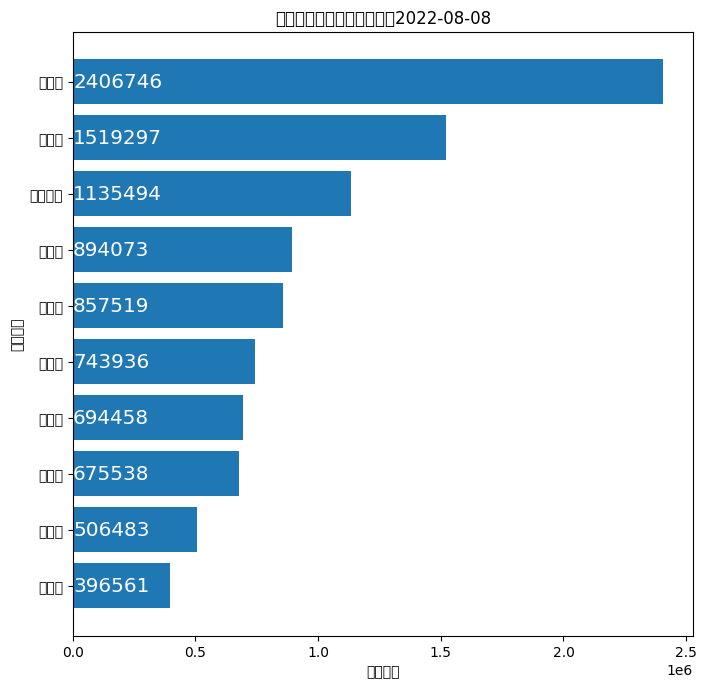

In [31]:
%matplotlib inline

import pandas as pd
import requests

import matplotlib.pyplot as plt
from matplotlib import rcParams
!pip install -q japanize-matplotlib

import japanize_matplotlib
# 「IPA」フォントをインストール
!apt-get -y install fonts-ipafont-gothic -qq
# matplotlibのキャッシュをクリア
# !rm /root/.cache/matplotlib/fontlist-v310.json

# データをダウンロード
url = 'https://data.corona.go.jp/converted-json/covid19japan-all.json'

response = requests.get(url)

covid19japan_json = response.json()

# データの加工
covid19japan_data = pd.DataFrame(covid19japan_json[0]['area'])

df = covid19japan_data.assign(lastUpdate=covid19japan_json[0]['lastUpdate'])

df = df.sort_values('npatients')
df = df.tail(10)

#　グラフの描画
rcParams['font.family'] = "IPAGothic"

plt.figure(figsize=(8, 8),dpi=100)

plt.barh(df['name_jp'],df['npatients'])

plt.title('コロナウィルス感染者数　'+df['lastUpdate'][0])
plt.xlabel('感染者数')
plt.ylabel('都道府県')

fig=[plt.text(1000,df.at[i,'name_jp'], df.at[i,'npatients'], va='center', color='w', fontsize='x-large') for i in df.index]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37117 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20140 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37117 missing from current font.
  font.set_text

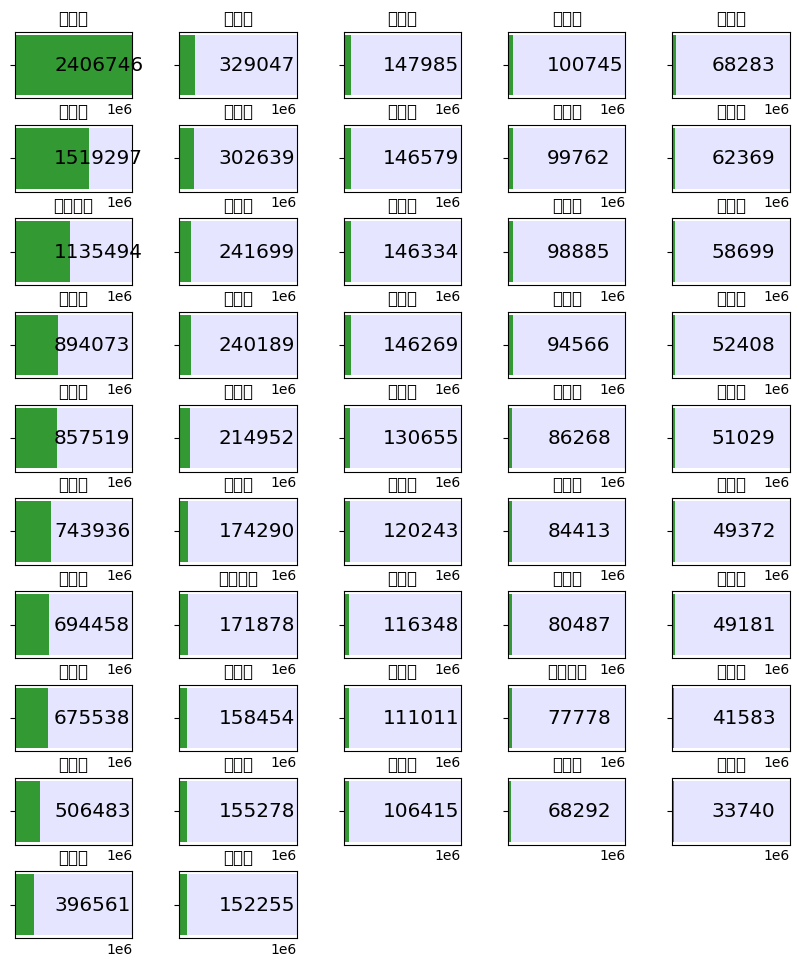

In [32]:
#データのダウンロードについては、上を参照
#

#データの加工
covid19japan_data = pd.DataFrame(covid19japan_json[0]['area'])
df = covid19japan_data.assign(n_diff=max(covid19japan_data['npatients']) - covid19japan_data['npatients'], lastUpdate=covid19japan_json[0]['lastUpdate'])

df.sort_values('npatients', ascending=False, inplace=True)
df.reset_index(drop=True,inplace=True)

#グラフの描画
rcParams['font.family'] = "IPAGothic"

plt.figure(figsize=(10, 12),dpi=100)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

cols = 1
position = 1
for i in df.index:
    if position > 47:
        cols += 1
        position = cols
    plt.subplot(10,5, position).set_xlim([0,max(df['npatients'])])
    plt.tick_params(labelleft=False,labelbottom=False,bottom=False) # plt.tick_params()で軸の表示を消している。
    plt.title(df['name_jp'][i])
    plt.barh(df['name_jp'][i],df['npatients'][i],color='Green', alpha=0.8)
    plt.barh(df['name_jp'][i], df['n_diff'][i], left=df[i:i+1]['npatients'], color='b', alpha=0.1)
    plt.text(df['npatients'][0]//3,df['name_jp'][i], df['npatients'][i], va='center', color='Black', fontsize='x-large')
    position += 5

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37117 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20140 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37117 missing from current font.
  font.set_text

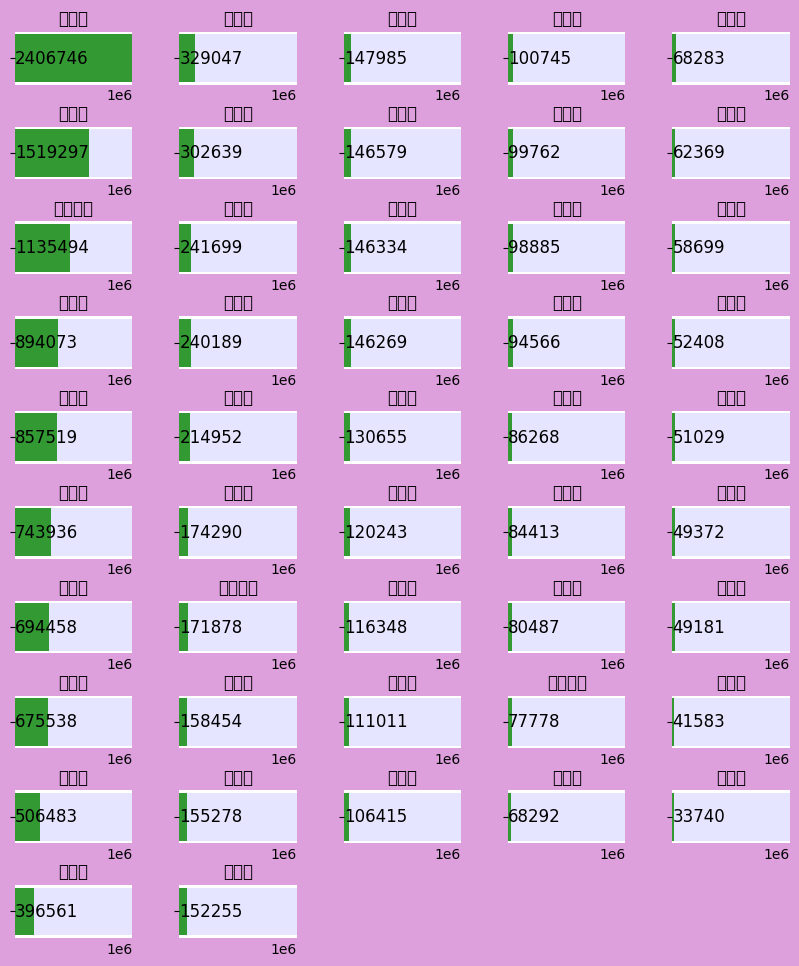

In [33]:
fig=plt.figure(figsize=(10,12), dpi=100, facecolor='plum')
fig.subplots_adjust(wspace=0.4, hspace=0.8)

cols = 1
position = 1
ax = []
for i in df.index:
    if position > 47:
        cols += 1
        position = cols
    ax.append(fig.add_subplot(10,5, position))
    ax[i].set_xlim([0,max(df['npatients'])])
    ax[i].tick_params(labelleft=False,labelbottom=False,bottom=False)
    ax[i].spines["right"].set_color("none")  # 右消し
    ax[i].spines["left"].set_color("none")   # 左消し
    ax[i].spines["top"].set_color("none")    # 上消し
    ax[i].spines["bottom"].set_color("none")    # 下消し
    ax[i].set_title(df['name_jp'][i], fontdict={'fontsize': 12})
    ax[i].barh(df['name_jp'][i],df['npatients'][i],color='Green', alpha=0.8)
    ax[i].barh(df['name_jp'][i], df['n_diff'][i], left=df['npatients'][i], color='b', alpha=0.1)
    ax[i].text(1000,df['name_jp'][i], df['npatients'][i], va='center', color='Black', fontdict={'fontsize': 12})
    position += 5

In [34]:
%matplotlib inline

import pandas as pd
import requests

import matplotlib.pyplot as plt
import matplotlib
!pip install -q japanize-matplotlib

import japanize_matplotlib
# 「IPA」フォントをインストール
!apt-get -y install fonts-ipafont-gothic -qq
matplotlib.font_manager._rebuild()
# matplotlibのキャッシュをクリア
#!rm /root/.cache/matplotlib/fontlist-v310.json
matplotlib.rcParams['font.family'] = "IPAGothic"

nhk_url="https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_prefectures_daily_data.csv"

# 日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
rr=requests.get(nhk_url)

import io

df_nhk=pd.read_csv(io.StringIO(rr.content.decode('utf-8')), skiprows=1,header=None, names=['date',"pref_code","pref_name","num","accum","death_num","death_accum"],index_col='date',parse_dates=True)

# df_nhk

#　最新の日付の情報を抽出

df_g1=df_nhk.loc[max(df_nhk.index),['pref_name','num']].set_index('pref_name').sort_values('num',ascending=False)

# 棒グラフ

fig = plt.figure(figsize=(20, 12),dpi=100)

ax= fig.add_subplot(111)
ax.set_title(df_nhk.tail(1).index[0])

fig=plt.xticks(rotation=45)

x=df_g1.index
y=df_g1.num

ax.bar(x,y,label='感染者数')

# 都道府県別人口の一覧を入手

url_pref='https://www.homemate.co.jp/research/population/all/'

pref_mass=pd.read_html(url_pref)[0].loc[:,['都道府県','人口']]
pref_mass.set_index('都道府県', inplace=True)

# 先ほどのデータと結合

df=pd.concat([df_g1,pref_mass],axis=1)
df = df.assign(
    mass=lambda x: x['人口'].str.replace(',','').str.replace('人','').astype(int),
    perm=lambda x: round(x.num / x.mass * 100000,2),
    n_diff=max(df['num']) - df['num'],
    colors=lambda x: (x.perm / 5)
)
df.drop(columns=['人口'], inplace=True)

# 描画
fig=plt.figure(figsize=(10,12), dpi=100, facecolor='khaki')
fig.subplots_adjust(wspace=0.4, hspace=0.8)
category_colors = plt.get_cmap('Reds',16)

cols = 1
position = 1
ax = []
for i,v in enumerate(df.index):
    if position > 47:
        cols += 1
        position = cols
    ax.append(fig.add_subplot(10,5, position))
    ax[i].set_xlim([0,max(df['num'])])
    ax[i].set_xscale('symlog')
    ax[i].tick_params(labelleft=False,labelbottom=False,bottom=False, labelright=False)
    ax[i].set_title(df.index[i], fontdict={'fontsize': 12, 'color': 'black'})
    ax[i].barh(df.index[i],df['num'][i],color=category_colors(df['colors'][i]), alpha=0.8)
    ax[i].barh(df.index[i], df['n_diff'][i], left=df['num'][i], color='b', alpha=0.5)
    ax[i].text(0,df.index[i], df['num'][i], va='center', color='w', fontdict={'fontsize': 12}) if df.colors[i] > 1. \
    else ax[i].text(0,df.index[i], df['num'][i], va='center', color='black', fontdict={'fontsize': 12})
    position += 5

ax=[axs.spines[sp].set_visible(False) for sp in ['top','bottom','right','left'] for axs in ax]

KeyError: ignored